In [124]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# To Scale our data
from sklearn.preprocessing import scale

# To perform KMeans clustering
from sklearn.cluster import KMeans

In [125]:
#reading Dataset
cricket = pd.read_csv("Cricket.csv", encoding = "ISO-8859-1", header= 0)

In [126]:
cricket.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28


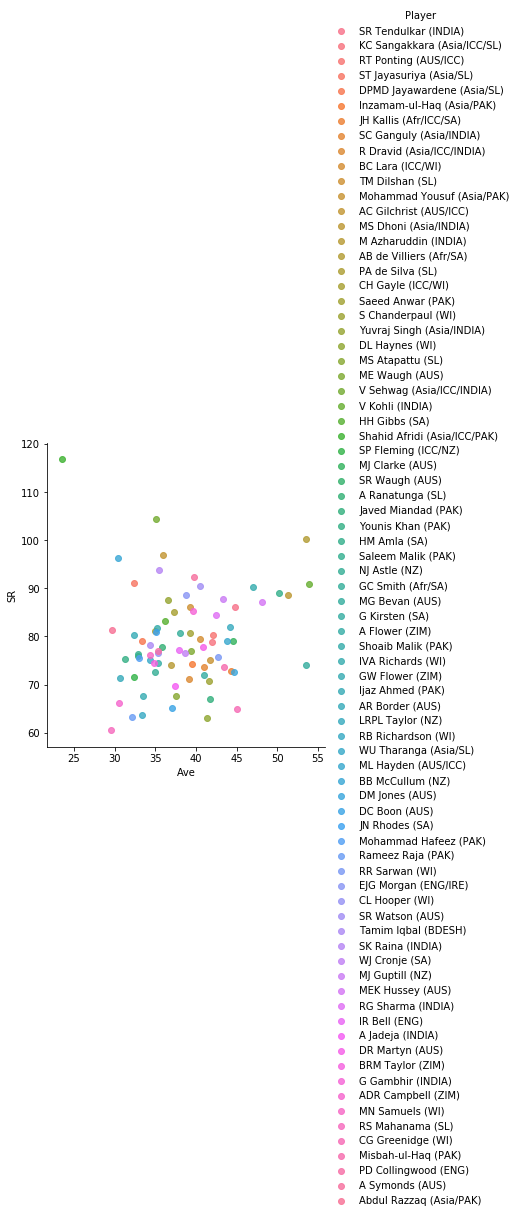

In [127]:
sns.lmplot('Ave', 'SR', data=cricket, hue='Player', fit_reg=False)

In [128]:
cricket.shape

(79, 13)

In [129]:
cricket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 13 columns):
Player    79 non-null object
Span      79 non-null object
Mat       79 non-null int64
Inns      79 non-null int64
NO        79 non-null int64
Runs      79 non-null int64
HS        79 non-null object
Ave       79 non-null float64
BF        79 non-null int64
SR        79 non-null float64
100       79 non-null int64
50        79 non-null int64
0         79 non-null int64
dtypes: float64(2), int64(8), object(3)
memory usage: 8.1+ KB


In [130]:
cricket.isnull().sum()*100/cricket.shape[0]

Player    0.0
Span      0.0
Mat       0.0
Inns      0.0
NO        0.0
Runs      0.0
HS        0.0
Ave       0.0
BF        0.0
SR        0.0
100       0.0
50        0.0
0         0.0
dtype: float64

In [131]:
cric = cricket[["Player","Ave","SR"]]
cricket_stats = cricket[["Ave","SR"]]

In [132]:
cricket_stats.head()

,Ave,SR
0,44.83,86.23
1,41.98,78.86
2,42.03,80.39
3,32.36,91.20
4,33.37,78.96


In [133]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
cricket_stats = scale.fit_transform(cricket_stats)

In [134]:
cricket_stats = pd.DataFrame(cricket_stats)
cricket_stats.columns = ["Average", "SR"]
cricket_stats.head()

,Average,SR
0,1.072294,0.703152
1,0.587725,-0.044139
2,0.596226,0.110997
3,-1.047909,1.207091
4,-0.876185,-0.034000


In [135]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [136]:
hp_score = hopkins(cricket_stats)
print(hp_score)

0.811627390633415


## K MEANS CLUSTERING

In [137]:
# Kmeans with K=4
model_clus4 = KMeans(n_clusters = 4, random_state=100)
model_clus4.fit(cricket_stats)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=100, tol=0.0001, verbose=0)

In [138]:
cric_km = pd.concat([cric, pd.Series(model_clus4.labels_)], axis=1)


In [139]:
cric_km.columns = ["Players","Average","Strike_Rate","Label"]

In [140]:
cric_km

,Players,Average,Strike_Rate,Label
0,SR Tendulkar (INDIA),44.83,86.23,3
1,KC Sangakkara (Asia/ICC/SL),41.98,78.86,1
2,RT Ponting (AUS/ICC),42.03,80.39,1
3,ST Jayasuriya (Asia/SL),32.36,91.20,0
4,DPMD Jayawardene (Asia/SL),33.37,78.96,2
5,Inzamam-ul-Haq (Asia/PAK),39.52,74.24,1
6,JH Kallis (Afr/ICC/SA),44.36,72.89,1
7,SC Ganguly (Asia/INDIA),41.02,73.70,1
8,R Dravid (Asia/ICC/INDIA),39.16,71.24,1
9,BC Lara (ICC/WI),40.48,79.51,1


In [141]:
cric_km.iloc()

In [142]:
cric_km_average = pd.DataFrame(cric_km.groupby(["Label"]).Average.mean())
cric_km_average.head()

,Average
Label,
0,35.409167
1,41.484444
2,33.949355
3,49.546667


In [143]:
cric_km_average = cric_km_average.reset_index()

In [144]:
cric_km_average

,Label,Average
0,0,35.409167
1,1,41.484444
2,2,33.949355
3,3,49.546667


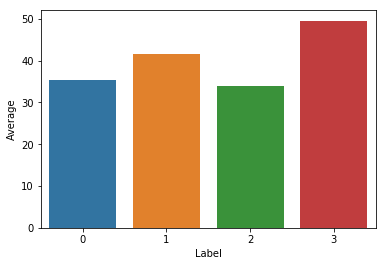

In [145]:
sns.barplot(x=cric_km_average.Label, y=cric_km_average.Average)

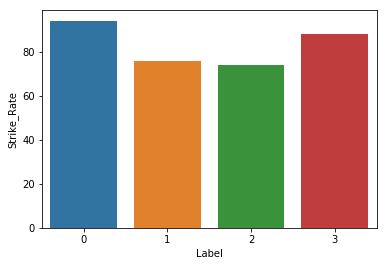

In [146]:
cric_km_sr = pd.DataFrame(cric_km.groupby(["Label"]).Strike_Rate.mean())
cric_km_sr = cric_km_sr.reset_index()
sns.barplot(x=cric_km_sr.Label, y=cric_km_sr.Strike_Rate)

## HIERARCHIAL CLUSTERING

In [153]:
# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

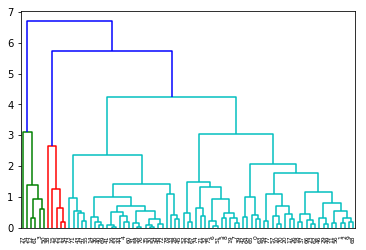

In [154]:
mergings = linkage(cricket_stats, method = "complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [155]:
clusterCut = pd.Series(cut_tree(mergings, n_clusters = 4).reshape(-1,))

In [156]:
cric_km1 = pd.concat([cric, clusterCut], axis=1)

In [157]:
cric_km1.columns = ["Players","Average","Strike_Rate","Label"]

In [158]:
cric_km1

,Players,Average,Strike_Rate,Label
0,SR Tendulkar (INDIA),44.83,86.23,0
1,KC Sangakkara (Asia/ICC/SL),41.98,78.86,0
2,RT Ponting (AUS/ICC),42.03,80.39,0
3,ST Jayasuriya (Asia/SL),32.36,91.20,1
4,DPMD Jayawardene (Asia/SL),33.37,78.96,2
5,Inzamam-ul-Haq (Asia/PAK),39.52,74.24,0
6,JH Kallis (Afr/ICC/SA),44.36,72.89,0
7,SC Ganguly (Asia/INDIA),41.02,73.70,0
8,R Dravid (Asia/ICC/INDIA),39.16,71.24,0
9,BC Lara (ICC/WI),40.48,79.51,0
